**GENERISANI OTPAD EDA ANALIZA**

Podaci preuzeti sa data.org.rs

**Izvor podataka:** Agencija za zaštitu životne sredine

Agencija za zaštitu životne sredine, kao organ u sastavu Ministarstva zaštite životne sredine, sa svojstvom pravnog lica, obavlja stručne poslove koji se odnose na: razvoj, usklađivanje i vođenje nacionalnog informacionog sistema zaštite životne sredine (praćenje stanja činilaca životne sredine kroz…

**Link prema skupu podataka**:https://data.gov.rs/sr/datasets/generisan-otpad-1/#community-resources

**Permalink**: https://data.gov.rs/sr/datasets/generisan-otpad-1/

**Datum preuzimanja**: 05.05.2025 godine

# Opis

Ovaj set podataka sadrži informacije o generisanom otpadu u Republici Srbiji, prikupljene iz Nacionalnog registra izvora zagađivanja. Podaci se odnose na različite privredne subjekte, uz detalje o vrsti i količini otpada.

Atributi seta podataka
Godina – Godina za koju se podaci odnose
Okrug – Naziv okruga u kojem se nalazi izvor zagađenja
Region – Naziv regiona u kojem se nalazi izvor zagađenja
Opština – Naziv opštine u kojoj se nalazi izvor zagađenja
Mesto – Naziv mesta u kojem se nalazi izvor zagađenja
ŠifraMesta – Jedinstvena šifra mesta u skladu sa zvaničnim kodiranjem
Pretežna delatnost – Osnovna delatnost preduzeća koje generiše otpad
PIB – Poreski identifikacioni broj preduzeća
Preduzeće – Naziv preduzeća koje generiše otpad
Nacionalni ID – Jedinstveni identifikator preduzeća u Nacionalnom registru izvora zagađenja
Postrojenje – Naziv postrojenja koje generiše otpad
PRTR kod – Kod u skladu sa Protokolom o registrima ispuštanja i prenosa zagađivača (PRTR)
Indeksni broj – Indeksni broj otpada prema zvaničnoj kategorizaciji
Opis otpada – Detaljan opis vrste otpada koji se generiše
Količina otpada – Količina otpada (izražena u tonama)

Ovi podaci omogućavaju praćenje generisanog otpada po geografskim i industrijskim kriterijumima, što doprinosi boljem upravljanju otpadom i zaštiti životne sredine.

In [1]:
# Učitavanje biblioteka potrebnih za EDA analizu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete!")

Setup Complete!


In [2]:
# Učitavanje skupa podataka
df = pd.read_excel("generisani_otpad.xlsx", engine="openpyxl")

In [3]:
# Osnovi pregled skupa podataka

In [3]:
# Kakav je oklik skupa podataka
print(f"Ukupan broj kolona u skupu je:",df.shape[0])
print(f"Ukupan broj kolona u skupu je:", df.shape[1])

Ukupan broj kolona u skupu je: 20210
Ukupan broj kolona u skupu je: 15


In [4]:
# Prikaz informacija o samom skupu podataka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20210 entries, 0 to 20209
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Godina             20210 non-null  int64  
 1   Okrug              20210 non-null  object 
 2   Region             20210 non-null  object 
 3   Opstina            20210 non-null  object 
 4   Mesto              20210 non-null  object 
 5   SifraMesta         20210 non-null  int64  
 6   PreteznaDelatnost  20206 non-null  object 
 7   PIB                20210 non-null  int64  
 8   Preduzece          20210 non-null  object 
 9   NacionalniId       20210 non-null  object 
 10  Postrojenje        20210 non-null  object 
 11  PRTRKod            20107 non-null  object 
 12  IndeksniBroj       20210 non-null  object 
 13  OpisOtpada         20210 non-null  object 
 14  KolicinaOtpadaT    20210 non-null  float64
dtypes: float64(1), int64(3), object(11)
memory usage: 2.3+ MB


**Komentar:** Iz osnovnih informacija o skupu možemom videti da ima 15 kolona, 20210 redova, 11 kolona sa object dtype i 4 koje imaju numeric dtype (numeričkim tipom podataka).
Skup je objedinjen i sadrži sve podatke za period 2023-2010 godina.

In [5]:
# Da li ima podataka po kolonama koji nedostaju?
df.isnull().sum()

Godina                 0
Okrug                  0
Region                 0
Opstina                0
Mesto                  0
SifraMesta             0
PreteznaDelatnost      4
PIB                    0
Preduzece              0
NacionalniId           0
Postrojenje            0
PRTRKod              103
IndeksniBroj           0
OpisOtpada             0
KolicinaOtpadaT        0
dtype: int64

**Komentar:** Ovde vidimo da za 4 reda nedostaje podatak u koloni PreteznaDelatnost kao i za 103 reda nedostaje podatak u koloni PRTRKod

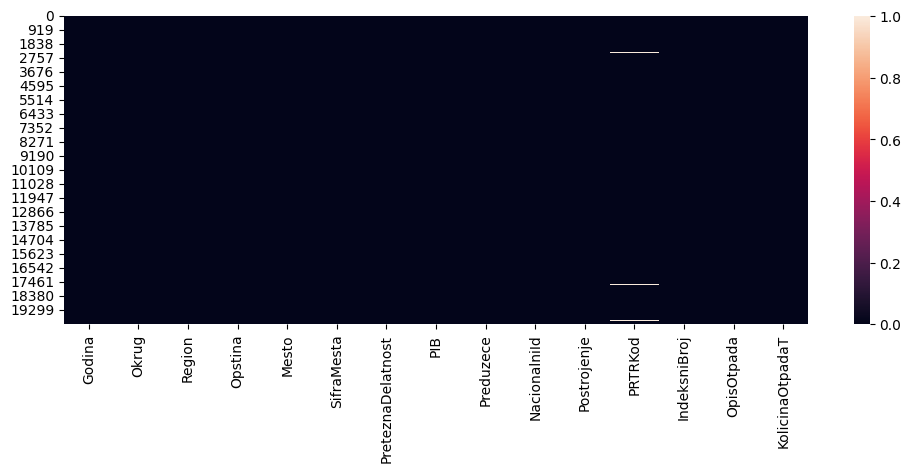

In [6]:
# Grafičko prikazivanje kolona kod kojih nedostaju podaci prikazani putem heatmap-e.
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull())
plt.show()

In [7]:
# Konverzija svih kolona koje su sa object dtype u mala slova
df = df.apply(lambda col: col.str.lower() if col.dtype == "object" else col)

In [8]:
# Prikaz prvih nekoliko redova nakon transformacije
print(df.head(3))

   Godina         Okrug                         Region Opstina Mesto  \
0    2023  borski okrug  region južne i istočne srbije     bor   bor   
1    2023  borski okrug  region južne i istočne srbije     bor   bor   
2    2023  borski okrug  region južne i istočne srbije     bor   bor   

   SifraMesta                                  PreteznaDelatnost        PIB  \
0      706418  0729 eksploatacija ruda ostalih crnih, obojeni...  100570195   
1      706418  0729 eksploatacija ruda ostalih crnih, obojeni...  100570195   
2      706418  0729 eksploatacija ruda ostalih crnih, obojeni...  100570195   

                     Preduzece NacionalniId  \
0  serbia zijin copper doo bor  100570195/2   
1  serbia zijin copper doo bor  100570195/4   
2  serbia zijin copper doo bor  100570195/4   

                                        Postrojenje     PRTRKod IndeksniBroj  \
0  ogranak rbb bor - rudnici bakra bor doo, krečana  3.(c).(ii)    15 01 10*   
1   ogranak rbb bor - površinski kop veliki k

In [9]:
# Konverzija iz int64 u object (tj. string)
df[["Godina", "SifraMesta", "PIB"]] = df[["Godina", "SifraMesta", "PIB"]].astype(str)

# Provera tipova podataka nakon konverzije
print(df.dtypes)

Godina                object
Okrug                 object
Region                object
Opstina               object
Mesto                 object
SifraMesta            object
PreteznaDelatnost     object
PIB                   object
Preduzece             object
NacionalniId          object
Postrojenje           object
PRTRKod               object
IndeksniBroj          object
OpisOtpada            object
KolicinaOtpadaT      float64
dtype: object


In [10]:
# Prikaz broja duplikata u DataFrame-u
print(f"Broj dupliranih redova: {df.duplicated().sum()}")

Broj dupliranih redova: 0


In [11]:
# Prikaz osnovne statistike za numeričke kolone
print(df.describe())

       KolicinaOtpadaT
count     2.021000e+04
mean      5.061817e+03
std       9.081651e+04
min       0.000000e+00
25%       3.800000e-01
50%       3.000000e+00
75%       3.000000e+01
max       4.000000e+06


**Komentar:**Statistika pokazuje da postoji velika varijacija u vrednostima KolicinaOtpadaT – standardna devijacija (std = 90,816.51) je dosta visoka u odnosu na prosek (mean = 5,061.82), što ukazuje na širok raspon podataka.

# Evo nekih ključnih zapažanja:

Minimalna vrednost = 0, što znači da postoje unosi bez generisanog otpada. Maksimalna vrednost = 4,000,000, što pokazuje da neki zapisi imaju izuzetno visoke vrednosti.
Medijana (50%) = 3, dok je prosek znatno veći – ovo ukazuje da dataset verovatno ima outliere (ekstremne vrednosti). 25% kvartil = 0.38, 75% kvartil = 30, što znači da većina vrednosti otpada ostaje relativno niska, ali postoji mali broj zapisa sa izuzetno visokim količinama otpada.

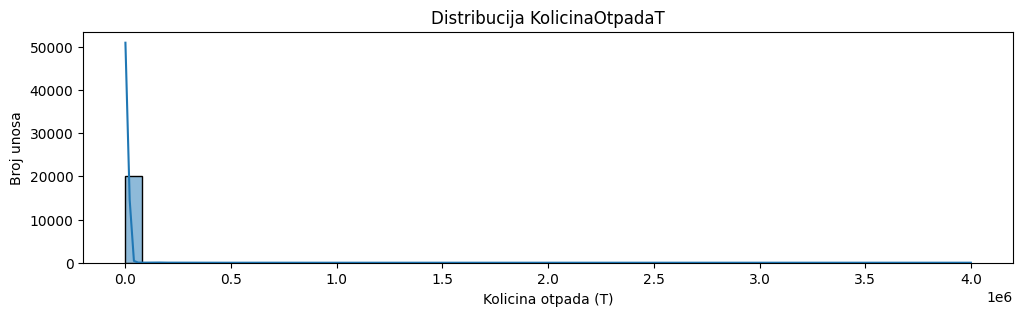

In [13]:
# Vizualizuješ raspodelu podataka (histogram)

plt.figure(figsize=(12, 3))
sns.histplot(df["KolicinaOtpadaT"], bins=50, kde=True)
plt.title("Distribucija KolicinaOtpadaT")
plt.xlabel("Kolicina otpada (T)")
plt.ylabel("Broj unosa")

# Čuvanje slike
plt.savefig("histogram_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:** Histogram prikazuje raspodelu količine otpada u datasetu. Većina unosa je koncentrisana blizu nule, dok mali broj vrednosti ide sve do 4 miliona tona, što potvrđuje postojanje ekstremnih vrednosti (outliera)

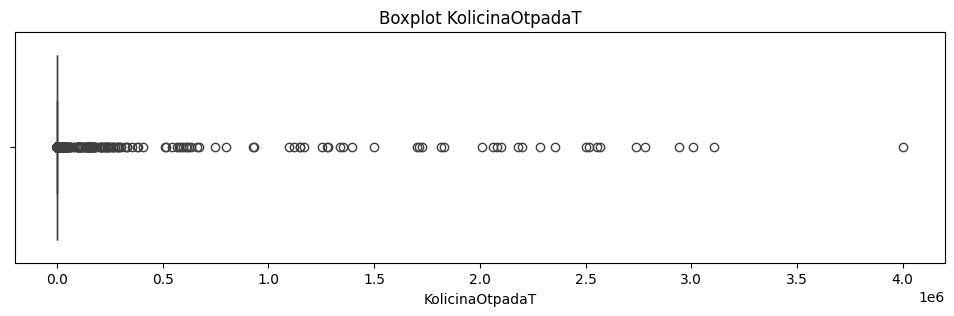

In [14]:
# Boxplot za identifikaciju outliera
plt.figure(figsize=(12, 3))
sns.boxplot(x=df["KolicinaOtpadaT"])
plt.title("Boxplot KolicinaOtpadaT")

# Čuvanje slike
plt.savefig("boxplot_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:**
Boxplot jasno prikazuje da je raspodela količine otpada vrlo asimetrična, sa velikim brojem outliera (ekstremnih vrednosti). 🔍

## Ključna zapažanja:
Veliki broj vrednosti koncentrisanih na donjem delu – većina podataka se nalazi u relativno malom rasponu. Postojanje ekstremno visokih vrednosti – nekoliko podataka se znatno razlikuje od ostatka dataset-a. Skewed distribucija – kutija (IQR) je blizu donjeg dela raspona, dok se outlieri protežu daleko.

In [15]:
# Transformacija podataka (log-transformacija može pomoći):
df["KolicinaOtpadaT_log"] = np.log1p(df["KolicinaOtpadaT"])

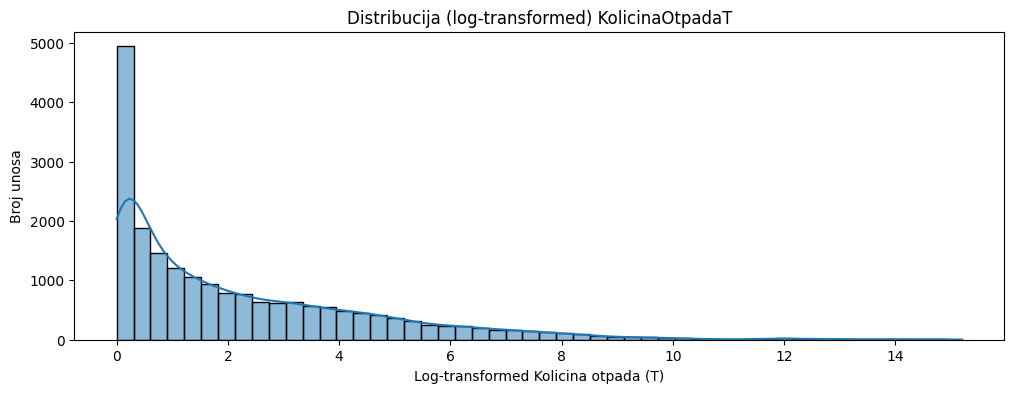

In [16]:
# Kako sada izgleda distribucija nakon log-transformacije:

plt.figure(figsize=(12, 4))
sns.histplot(df["KolicinaOtpadaT_log"], bins=50, kde=True)
plt.title("Distribucija (log-transformed) KolicinaOtpadaT")
plt.xlabel("Log-transformed Kolicina otpada (T)")
plt.ylabel("Broj unosa")

# Čuvanje slike
plt.savefig("histogram_log_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:** Histogram prikazuje distribuciju log-transformisane količine otpada. Većina podataka je sada ravnomernije raspoređena, ali još uvek postoji skewed distribucija, što može značiti da i dalje postoje ekstremne vrednosti.

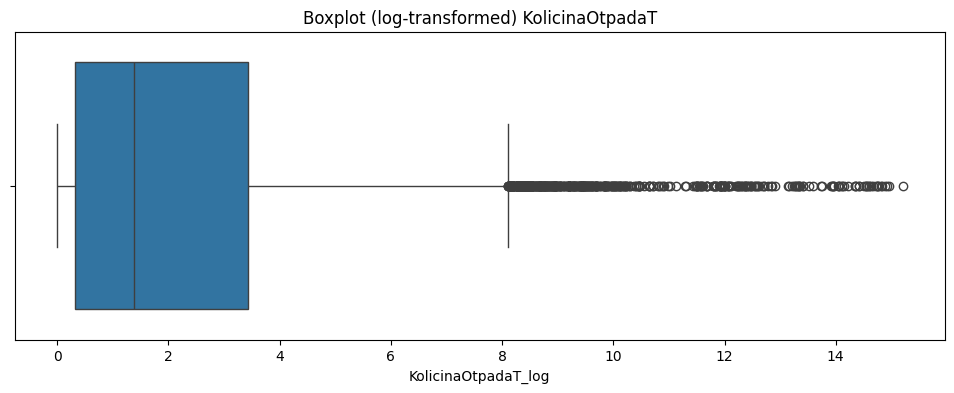

In [17]:
# Vizualizacija outliera nakon log-transformacije
# Ovaj boxplot treba da prikaže da li su ekstremne vrednosti i dalje prisutne:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df["KolicinaOtpadaT_log"])
plt.title("Boxplot (log-transformed) KolicinaOtpadaT")

# Čuvanje slike
plt.savefig("boxplot_log_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:** Boxplot za log-transformisanu količinu otpada pokazuje da se podaci sada mnogo ravnomernije distribuiraju, ali još uvek postoji dug rep outliera.

# Ključna zapažanja: 
Većina podataka je koncentrisana između 0 i 4 na log-skali. Postoji nekoliko ekstremnih vrednosti koje se protežu do oko 14 na skali. Log-transformacija je pomogla, ali možda još uvek treba dodatno filtrirati outliere.

In [18]:
# Računamo broj outliera i njihov procenat u dataset-u pomoću ovog koda:
Q1 = df["KolicinaOtpadaT_log"].quantile(0.25)
Q3 = df["KolicinaOtpadaT_log"].quantile(0.75)
IQR = Q3 - Q1

donja_granica = Q1 - 1.5 * IQR
gornja_granica = Q3 + 1.5 * IQR

# Filtriranje outliera
outlieri = df[(df["KolicinaOtpadaT_log"] < donja_granica) | (df["KolicinaOtpadaT_log"] > gornja_granica)]

# Broj i procenat outliera
broj_outliera = len(outlieri)
procenat_outliera = (broj_outliera / len(df)) * 100

print(f"Broj outliera: {broj_outliera}")
print(f"Procenat outliera u dataset-u: {procenat_outliera:.2f}%")

Broj outliera: 512
Procenat outliera u dataset-u: 2.53%


**Komentar:** Pošto je % outlier-a mali može se odlučiti da li ih zadržati ili odbaciti. Uzimajući u obzir da imamo malo podataka o ekstremnim vrednsotima ,a koji mogu biti značajni za analizu ove vrednosti će biti zadržane.

In [19]:
# Pregled najekstremnijih outliera - top 10 najvećih vrednosti:
print(outlieri.nlargest(10, "KolicinaOtpadaT"))

      Godina                Okrug             Region            Opstina  \
17351   2013  juå¾no-baäki okrug   region vojvodine            temerin   
5481    2020         grad beograd  beogradski region  beograd-obrenovac   
3933    2021         grad beograd  beogradski region  beograd-obrenovac   
8056    2019         grad beograd  beogradski region  beograd-obrenovac   
9000    2018         grad beograd  beogradski region  beograd-obrenovac   
11915   2017         grad beograd  beogradski region  beograd-obrenovac   
5970    2020         grad beograd  beogradski region  beograd-obrenovac   
7292    2019         grad beograd  beogradski region  beograd-obrenovac   
9076    2018         grad beograd  beogradski region  beograd-obrenovac   
2336    2022         grad beograd  beogradski region  beograd-obrenovac   

           Mesto SifraMesta  \
17351    temerin     804681   
5481   obrenovac     704741   
3933   obrenovac     704741   
8056   obrenovac     704741   
9000   obrenovac   

In [20]:
# Analiza distribucije po kategorijama: Da li određene godine ili mesta imaju više outliera?
print(outlieri["Godina"].value_counts())  # Po godinama
print(outlieri["Mesto"].value_counts())  # Po mestima

Godina
2019    47
2022    43
2016    42
2013    41
2011    41
2014    40
2015    40
2012    40
2018    40
2020    36
2017    36
2023    34
2021    32
Name: count, dtype: int64
Mesto
kragujevac    30
radinac       30
smederevo     23
obrenovac     23
vreoci        20
              ..
bancarevo      1
uzovnica       1
leskovac       1
kaleniä‡       1
å tavalj       1
Name: count, Length: 70, dtype: int64


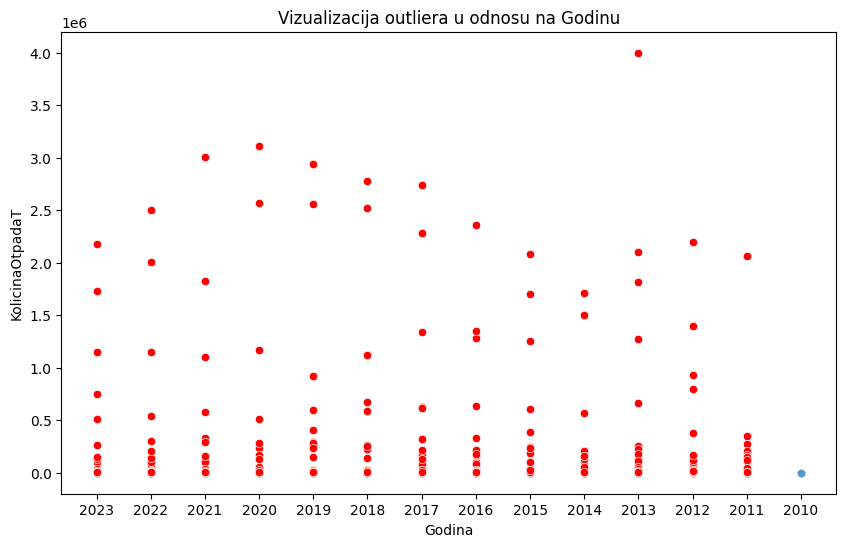

In [21]:
# Vizualizacija odnosa između varijabli Možemo pogledati da li ekstremne vrednosti imaju zajedničke karakteristike.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Godina", y="KolicinaOtpadaT", data=df, alpha=0.5)
sns.scatterplot(x="Godina", y="KolicinaOtpadaT", data=outlieri, color="red")
plt.title("Vizualizacija outliera u odnosu na Godinu")

# Čuvanje slike
plt.savefig("vizuelizacija_outlier_po_godinama.png", dpi=100, bbox_inches="tight")
plt.show()

**Potvrda zapažanja:**

Top 10 outlier vrednosti: Dominira Javno preduzeće Elektroprivreda Srbije, sa postrojenjima TENT A i TENT B, i količinama otpada u rasponu od 14,7 do 15,2 miliona tona.Godine sa najvećim brojem outliera: 2019 (47), 2022 (43), 2016 (42) itd.Mesta sa najvećim brojem outliera: Kragujevac (30), Radinac (30), Smederevo (23) itd.
Scatterplot pokazuje najveću količinu otpada u 2013, zatim slede 2020, 2019 i 2021.

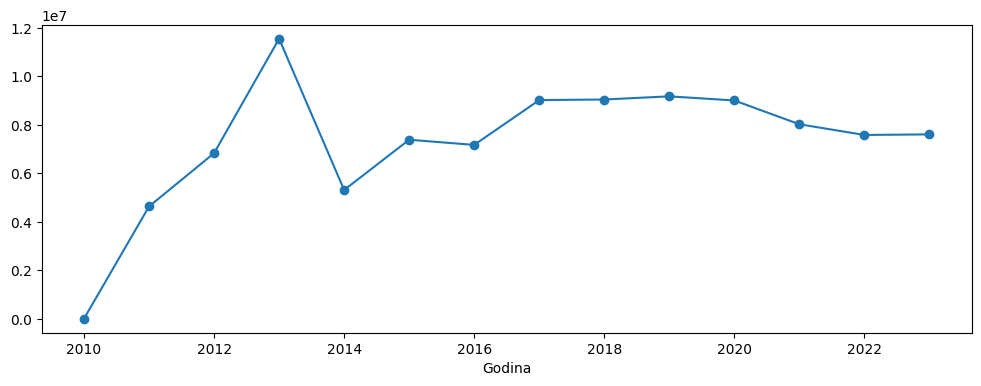

In [22]:
# Trend analizu – Kako se količina otpada menjala kroz godine?
plt.figure(figsize=(12,4))
df.groupby("Godina")["KolicinaOtpadaT"].sum().plot(kind="line", marker="o")

# Čuvanje slike
plt.savefig("količina_otpada_kroz_godine.png", dpi=100, bbox_inches="tight")
plt.show()

**Ključna zapažanja iz vizualizacije:**

2013 i 2017 su imale značajne skokove otpada, što može ukazivati na veće industrijske aktivnosti ili promene u regulaciji.Posle 2020 dolazi do pada količine otpada, što može biti rezultat novih ekoloških politika ili smanjenja industrijske proizvodnje. Najveća količina otpada generisana je u 2013, što se poklapa sa prethodnim zapažanjima iz outlier analize.

In [23]:
# prikaži sve kolone
df.columns

Index(['Godina', 'Okrug', 'Region', 'Opstina', 'Mesto', 'SifraMesta',
       'PreteznaDelatnost', 'PIB', 'Preduzece', 'NacionalniId', 'Postrojenje',
       'PRTRKod', 'IndeksniBroj', 'OpisOtpada', 'KolicinaOtpadaT',
       'KolicinaOtpadaT_log'],
      dtype='object')

In [24]:
# korekcija naziva regiona i ispravljanje ćiriličnih slova
df["Region"]=df["Region"].replace({
    "region å\xa0umadije i zapadne srbije":"region šumadije i zapadne srbije",
    "region juå¾ne i istoä\x8dne srbije":"region južne i istočne srbije"

})

In [25]:
df["Region"].unique()

array(['region južne i istočne srbije', 'beogradski region',
       'region vojvodine', 'region šumadije i zapadne srbije'],
      dtype=object)

In [26]:
# Grupna analiza po kategorijama – Kako se količina otpada razlikuje po regionima, delatnostima, godinama?
df.groupby("Region")["KolicinaOtpadaT"].sum().sort_values(ascending=False)

Region
beogradski region                   5.742943e+07
region južne i istočne srbije       3.522806e+07
region vojvodine                    6.714475e+06
region šumadije i zapadne srbije    2.927364e+06
Name: KolicinaOtpadaT, dtype: float64

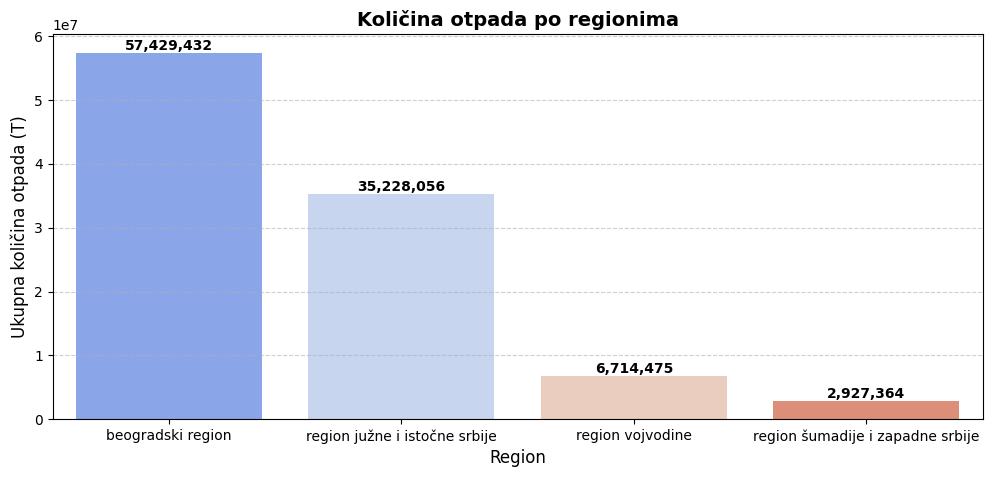

In [27]:
# Priprema podataka
region_data = df.groupby("Region")["KolicinaOtpadaT"].sum().sort_values(ascending=False)

# Postavljanje coolwarm palete
colors = sns.color_palette("coolwarm", len(region_data))

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=region_data.index, y=region_data.values,hue=region_data.index, palette=colors, legend=False)

# Dodavanje anotacija na svaki bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Podešavanje izgleda
plt.xticks(rotation=0)  # X osa horizontalno
plt.title("Količina otpada po regionima", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Ukupna količina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

# Čuvanje slike
plt.savefig("region_otpad_enhanced.png", dpi=100, bbox_inches="tight")
plt.show()

In [28]:
df["Opstina"]=df["Opstina"].replace({"medveä‘a":"medveđa"})

In [29]:
df.groupby("Opstina")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)

Opstina
beograd-obrenovac    5.325148e+07
kostolac             2.274752e+07
smederevo            8.384954e+06
temerin              4.044351e+06
beograd-lazarevac    3.678583e+06
vranjska banja       1.738250e+06
svilajnac            1.518251e+06
sokobanja            8.774281e+05
medveđa              5.502559e+05
kragujevac - grad    5.018878e+05
Name: KolicinaOtpadaT, dtype: float64

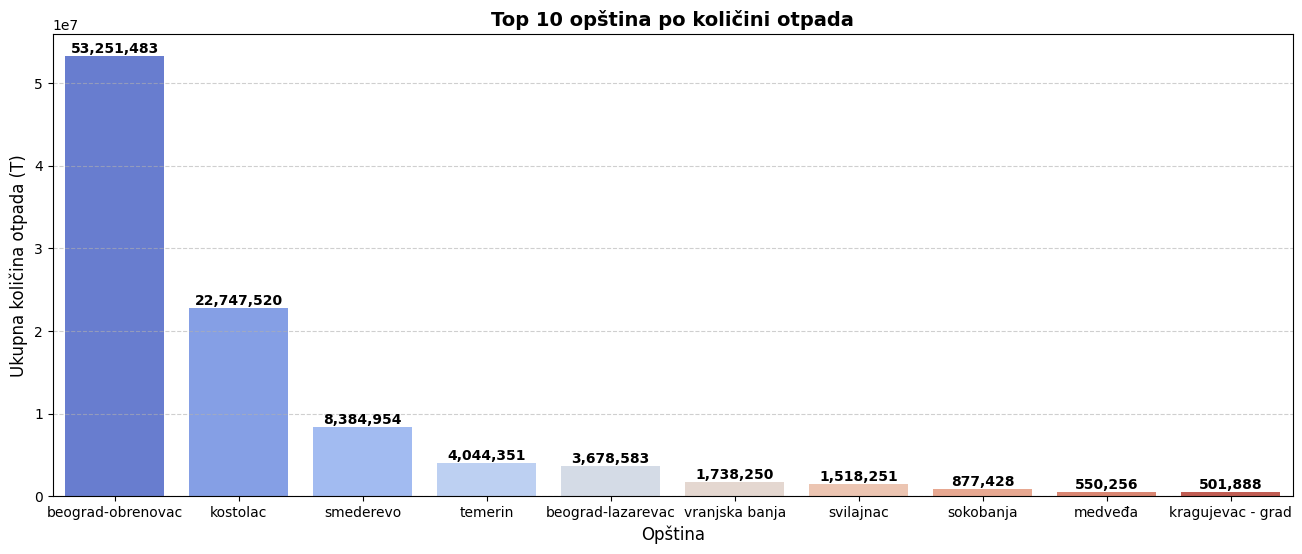

In [30]:
# Priprema podataka
opstine_data = df.groupby("Opstina")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette("coolwarm", len(opstine_data))

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=opstine_data.index, y=opstine_data.values, hue=opstine_data.index, palette=colors, legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=0)
plt.title("Top 10 opština po količini otpada", fontsize=14, fontweight="bold")
plt.xlabel("Opština", fontsize=12)
plt.ylabel("Ukupna količina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.savefig("opstine_otpad_enhanced.png", dpi=100, bbox_inches="tight")
plt.show()

In [31]:
# korekcija naziva opština i ispravljanje ćiriličnih slova
df["PreteznaDelatnost"] = df["PreteznaDelatnost"].replace({
    "3514 trgovina elektriänom energijom": "3514 trgovina električnom energijom",
    "3511 proizvodnja elektriäne energije": "3511 proizvodnja električne energije",
    "2410 proizvodnja sirovog gvoå¾ä‘a, äelika i ferolegura": "2410 proizvodnja sirovog gvožđa, čelika i ferolegura",
    "0111 gajenje å¾ita (osim pirinäa), leguminoza i uljarica": "0111 gajenje žita (osim pirinča), leguminoza i uljarica"
})

In [33]:
# Top 5 delatnosti po generisanom otpadu
delatnost_data=df.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)
delatnost_data

PreteznaDelatnost
3514 trgovina električnom energijom                                            6.212549e+07
3511 proizvodnja električne energije                                           1.876272e+07
2410 proizvodnja sirovog gvožđa, čelika i ferolegura                           8.834012e+06
0111 gajenje žita (osim pirinča), leguminoza i uljarica                        4.537666e+06
0729 eksploatacija ruda ostalih crnih, obojenih, plemenitih i drugih metala    2.428312e+06
Name: KolicinaOtpadaT, dtype: float64

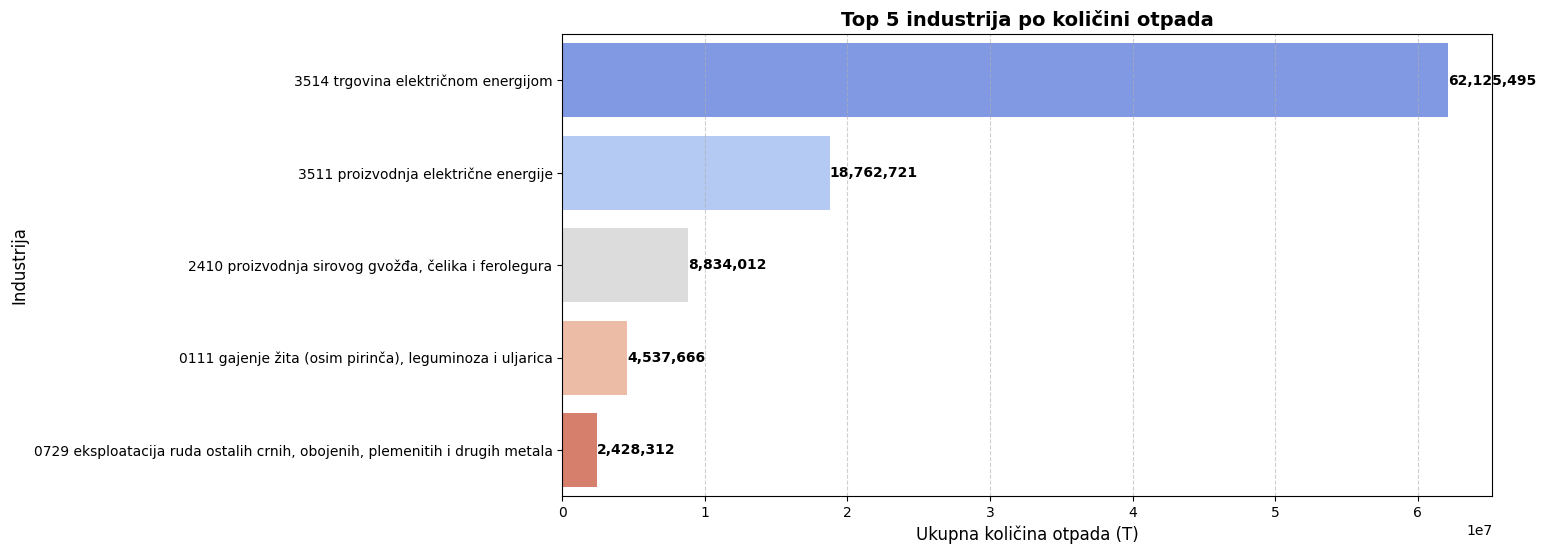

In [34]:
# Priprema podataka
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=delatnost_data.index, x=delatnost_data.values,hue=delatnost_data.index, palette="coolwarm", legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

# Podešavanje izgleda
plt.title("Top 5 industrija po količini otpada", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna količina otpada (T)", fontsize=12)
plt.ylabel("Industrija", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

plt.savefig("industrije_otpad_horizontal.png", dpi=100, bbox_inches="tight")
plt.show()

In [35]:
#Korekcija opisa otpada sa promenom ćiriličnih slova
df["OpisOtpada"] = df["OpisOtpada"].replace({
    "leteä‡i pepeo od uglja": "leteći pepeo od uglja",
    "otpadi od prerade å¡ljake":"otpadi od prerade šljake",
    "otpadi iz fiziäke i hemijske obrade minerala za obojenu metalurgiju koji sadrå¾e opasne supstance":"otpadi iz fizičke i hemijske obrade minerala za obojenu metalurgiju koji sadrže opasne supstance",
    "jalovine drugaäije od onih navedenih u 01 03 04 i 01 03 05":"jalovine drugačije od onih navedenih u 01 03 04 i 01 03 05",
    "pepeo, å¡ljaka i praå¡ina iz kotla (izuzev praå¡ine iz kotla navedene u 10 01 04)":"pepeo, šljaka i prašina iz kotla (izuzev prašine iz kotla navedene u 10 01 04)",
    "solidifikovani otpadi drugaäiji od onih navedenih u 19 03 06":"solidifikovani otpadi drugačiji od onih navedenih u 19 03 06",
    "gvoå¾ä‘e i äelik":"gvožđe i čelik",
    "å¾ivotinjski feces, urin i ä‘ubrivo (ukljuäujuä‡i i otpadnu slamu), teäni otpad, sakupljen odvojeno i tretiran van mesta nastajanja":"životinjski feces, urin i đubrivo (uključujući i otpadnu slamu), tečni otpad, sakupljen odvojeno i tretiran van mesta nastajanja",
    "nepreraä‘ena šljaka":"neprerađena šljaka",
    "otpadi koji nisu drugaäije specificirani":"otpadi koji nisu drugačije specificirani"        
})

In [36]:
# Top 10 opisa otpda po generisanom otpadu
otpadi_data=df.groupby("OpisOtpada")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)
otpadi_data

OpisOtpada
leteći pepeo od uglja                                                                                                               7.720629e+07
životinjski feces, urin i đubrivo (uključujući i otpadnu slamu), tečni otpad, sakupljen odvojeno i tretiran van mesta nastajanja    4.887704e+06
otpadi od prerade šljake                                                                                                            3.679848e+06
pepeo, šljaka i prašina iz kotla (izuzev prašine iz kotla navedene u 10 01 04)                                                      3.458978e+06
solidifikovani otpadi drugačiji od onih navedenih u 19 03 06                                                                        2.176337e+06
otpadi iz fizičke i hemijske obrade minerala za obojenu metalurgiju koji sadrže opasne supstance                                    1.779022e+06
nepreraä‘ena å¡ljaka                                                                                                   

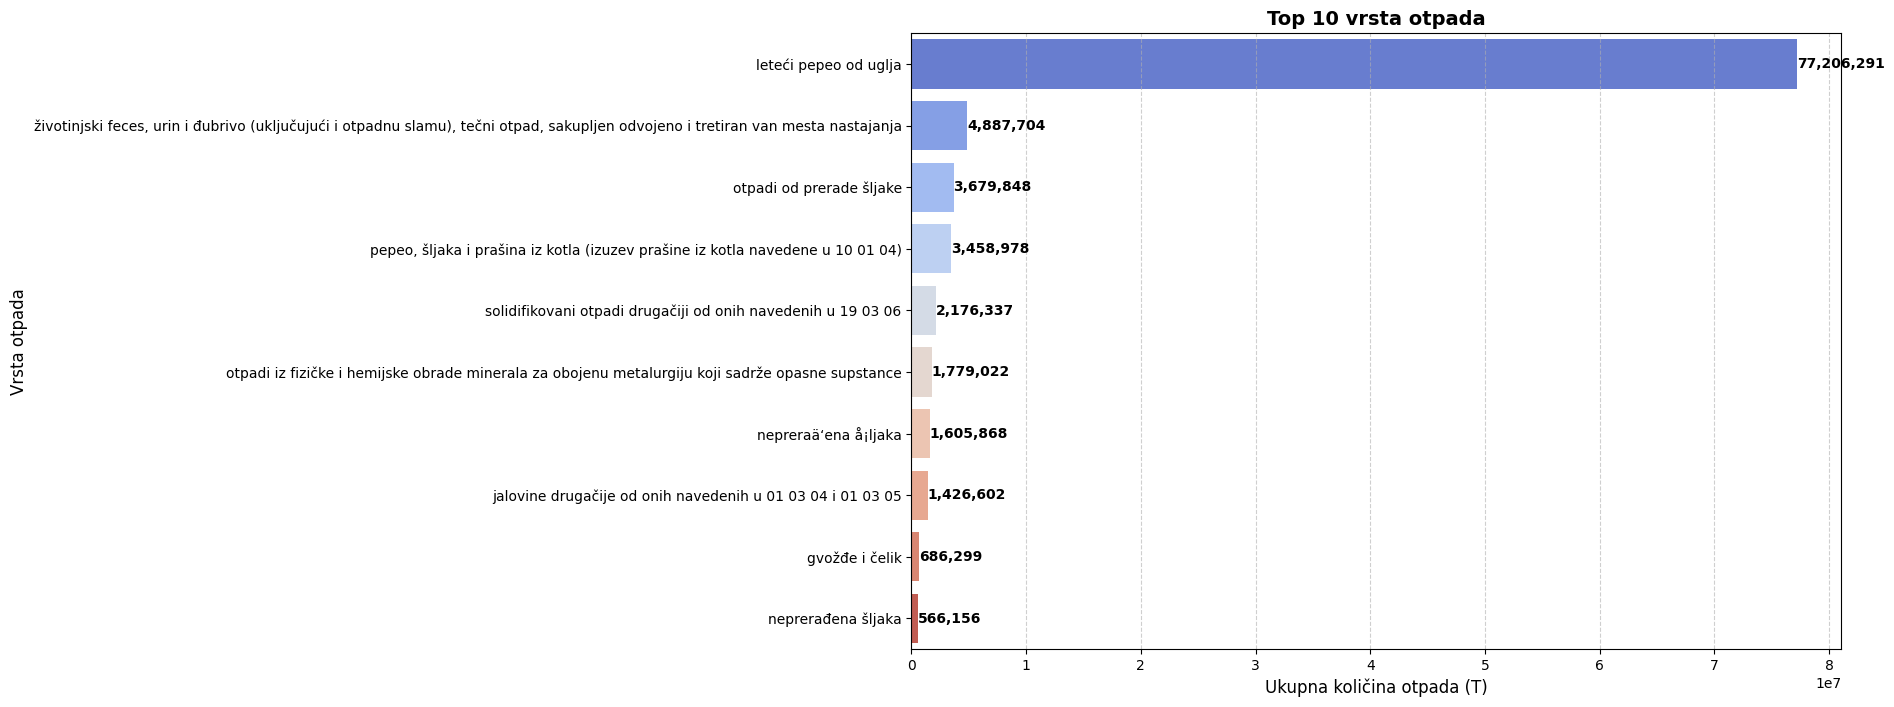

In [37]:
# Priprema podataka
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=otpadi_data.index, x=otpadi_data.values, hue=otpadi_data.index,  palette="coolwarm", legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

plt.title("Top 10 vrsta otpada", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna količina otpada (T)", fontsize=12)
plt.ylabel("Vrsta otpada", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

plt.savefig("otpadi_horizontal.png", dpi=100, bbox_inches="tight")
plt.show()

In [38]:
# Pregled generisani otpad na godišnjem nivou
godine_data=df.groupby("Godina")["KolicinaOtpadaT"].sum().sort_values(ascending=False)
godine_data

Godina
2013    1.154822e+07
2019    9.171519e+06
2018    9.041495e+06
2017    9.016721e+06
2020    9.001333e+06
2021    8.019582e+06
2023    7.602857e+06
2022    7.578833e+06
2015    7.381995e+06
2016    7.169308e+06
2012    6.827764e+06
2014    5.309144e+06
2011    4.630551e+06
2010    7.120000e-01
Name: KolicinaOtpadaT, dtype: float64

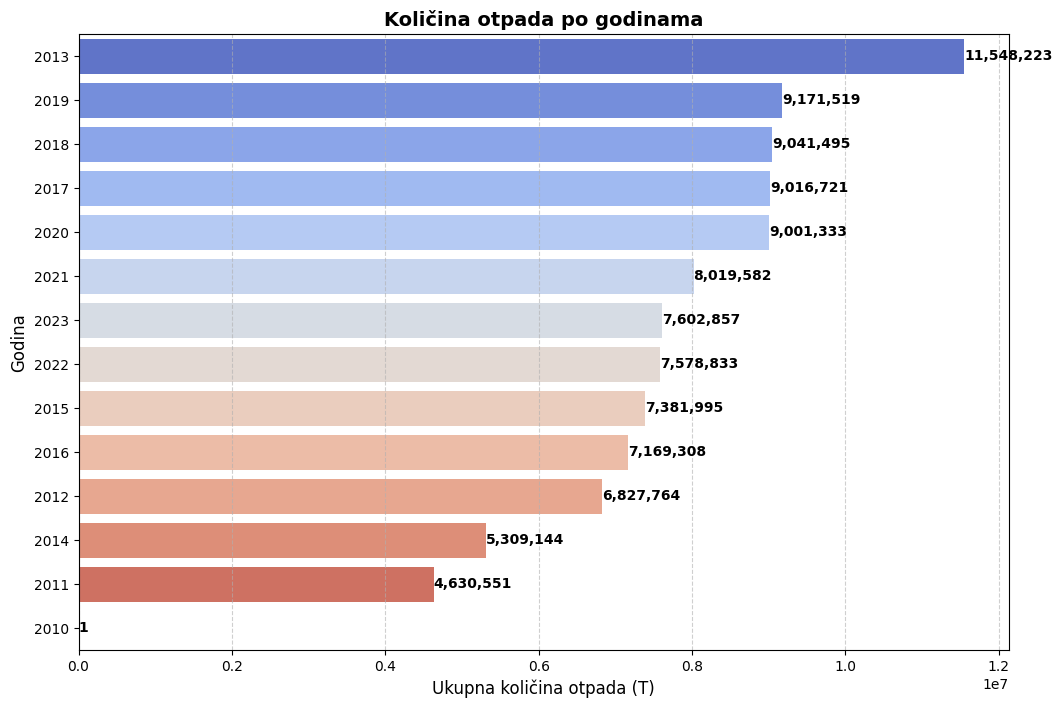

In [39]:
# Priprema podataka
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=godine_data.index, x=godine_data.values, hue=godine_data.index, palette="coolwarm", legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

plt.title("Količina otpada po godinama", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna količina otpada (T)", fontsize=12)
plt.ylabel("Godina", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

plt.savefig("godine_otpad_horizontal.png", dpi=100, bbox_inches="tight")
plt.show()

🔍 Ključna zapažanja iz podataka
*Regionalna analiza* – Najveća količina otpada se generiše u Beogradskom regionu (57.4 miliona tona), dok region Južne i Istočne Srbije ima sledeću najveću vrednost (35.2 miliona tona). 
*Opštine sa najvećim količinama otpada* – Beograd-Obrenovac (53.2 miliona tona) dominira, a zatim slede Kostolac (22.7M) i Smederevo (8.3M). 
*Najveće pretežne delatnosti* – Trgovina električnom energijom (62.1M tona otpada) je najdominantnija, dok proizvodnja električne energije i metalurgija zauzimaju sledeće pozicije. 
*Vrste otpada* – Leteći pepeo od uglja (77.2M tona) je najzastupljeniji, što ukazuje na dominaciju termoelektrana u generisanju otpada. 
*Trend po godinama* – 2013. godina je imala najveću količinu otpada (11.5M tona), dok su sledeće ključne godine 2019, 2018, 2017 i 2020 sa nešto manjim vrednostima.

# Poređenje trendova između regiona
Želimo da sagledamo kako se količina otpada menja po regionima kroz godine. Ovo će nam pokazati da li određeni regioni imaju postojan rast, fluktuacije, ili iznenadne padove.
*Vizualizacija trendova otpada po regionima*

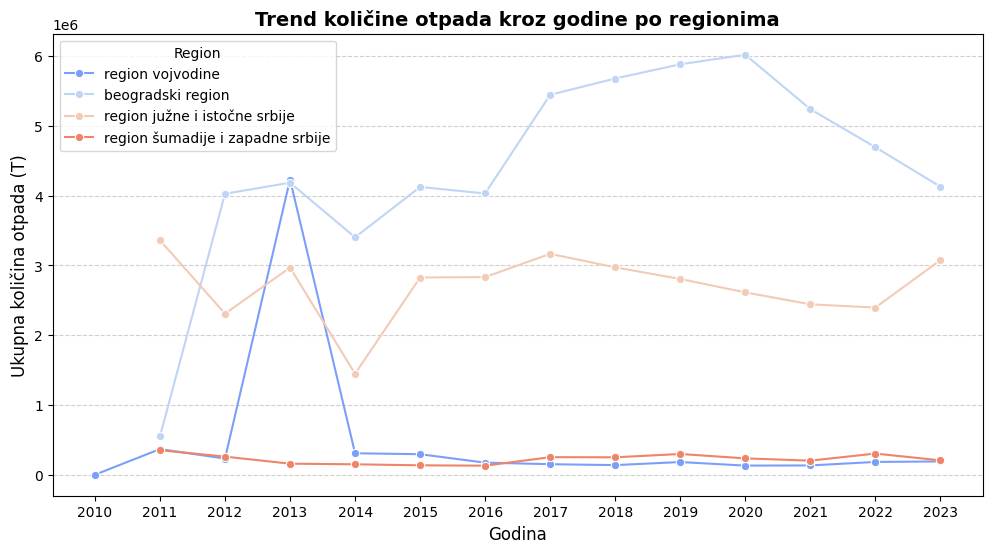

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df.groupby(["Godina", "Region"])["KolicinaOtpadaT"].sum().reset_index(), 
                  x="Godina", y="KolicinaOtpadaT", hue="Region", marker="o", palette="coolwarm")

# Podešavanje izgleda
plt.title("Trend količine otpada kroz godine po regionima", fontsize=14, fontweight="bold")
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Ukupna količina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.savefig("regioni_trend_otpad.png", dpi=100, bbox_inches="tight")
plt.show()

**Ključna zapažanja:** 
*Beogradski region* – Imao je značajan rast otpada između 2011 i 2014, zatim postepeni pad. 
*Region Vojvodine* – Doživeo oštar skok u 2012 i 2013, a zatim stabilizaciju na nižem nivou. 
*Region južne i istočne Srbije* – Imao je fluktuacije sa vrhuncem oko 2013, nakon čega sledi pad. 
*Region Šumadije i zapadne Srbije* – Relativno stabilan trend uz blage oscilacije.

**Šta je uzrokovalo rast otpada u Beogradskom regionu od 2011 do 2014?**
# Potencijalni faktori: 
1.Ekspanzija termoelektrana – Termoelektrane Nikola Tesla (TENT A i B) su među glavnim generatorima otpada u Obrenovcu. 
2.Rast industrijskih aktivnosti – Povećana proizvodnja energije često znači veće količine letećeg pepela i šljačnog otpada.
3.Regulatorne promene – Da li su u tom periodu uvedeni novi propisi o prijavljivanju industrijskog otpada?
4.Demografski pritisak – Rast stanovništva u Beogradu može doprineti većoj proizvodnji komunalnog otpada.

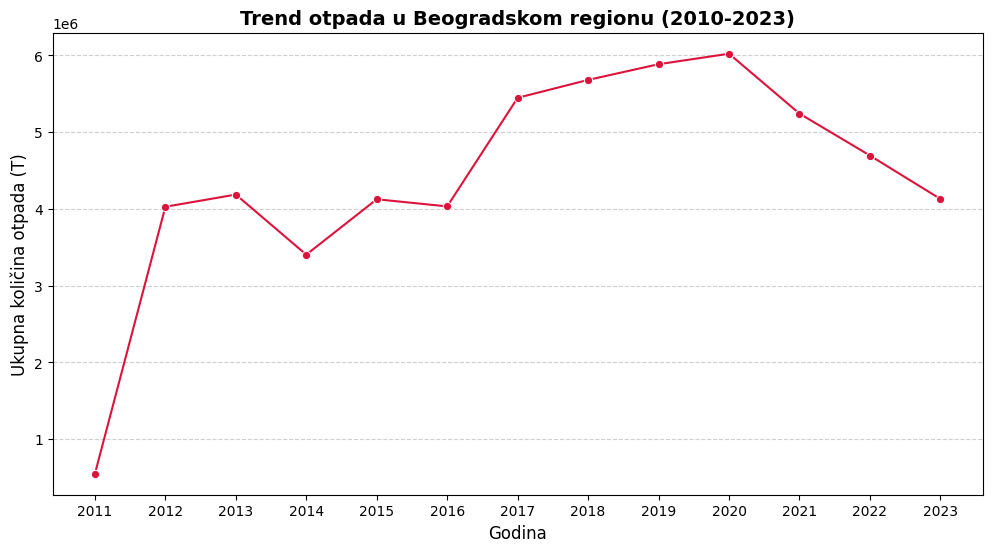

In [41]:
# Vizualizacija otpada u Beogradskom regionu kroz godine
plt.figure(figsize=(12, 6))
beograd_trend = df[df["Region"] == "beogradski region"].groupby("Godina")["KolicinaOtpadaT"].sum()

ax = sns.lineplot(x=beograd_trend.index, y=beograd_trend.values, marker="o", color="crimson")
plt.title("Trend otpada u Beogradskom regionu (2010-2023)", fontsize=14, fontweight="bold")
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Ukupna količina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.savefig("beograd_otpad_trend.png", dpi=100, bbox_inches="tight")
plt.show()

In [42]:
# promena dtype za kolonu df["Godina"] u numeric dtype
df["Godina"] = pd.to_numeric(df["Godina"], errors="coerce")

In [43]:
# pregled podataka za Beogradski region za 2013 godinu
beograd_2013 = df[(df["Region"] == "beogradski region") & (df["Godina"] == 2013)]
print(beograd_2013.head())

       Godina         Okrug             Region            Opstina  \
16740    2013  grad beograd  beogradski region  beograd-äœukarica   
16741    2013  grad beograd  beogradski region  beograd-äœukarica   
16742    2013  grad beograd  beogradski region  beograd-äœukarica   
16743    2013  grad beograd  beogradski region  beograd-lazarevac   
16744    2013  grad beograd  beogradski region  beograd-lazarevac   

                     Mesto SifraMesta  \
16740  beograd (äœukarica)     791113   
16741                 umka     705195   
16742                 umka     705195   
16743           medoå¡evac     704130   
16744           medoå¡evac     704130   

                              PreteznaDelatnost        PIB  \
16740    3530 snabdevanje parom i klimatizacija  100139344   
16741         1712 proizvodnja papira i kartona  100003017   
16742         1712 proizvodnja papira i kartona  100003017   
16743  0520 eksploatacija lignita i mrkog uglja  101138490   
16744  0520 eksploatacija li

In [44]:
# Filtriranje podataka za Beograd u 2013
beograd_2013 = df[(df["Region"] == "beogradski region") & (df["Godina"] == 2013)]

# Grupisanje po industrijskom sektoru i sortiranje prema količini otpada
industrije_2013 = beograd_2013.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Prikaz podataka u tabelarnom obliku
print(industrije_2013)

PreteznaDelatnost
3511 proizvodnja električne energije                                                4129249.880
0520 eksploatacija lignita i mrkog uglja                                              35688.121
1712 proizvodnja papira i kartona                                                     13263.222
0146 uzgoj svinja                                                                      2500.350
1722 proizvodnja predmeta od papira za liänu upotrebu i upotrebu u domaä‡instvu       1840.300
Name: KolicinaOtpadaT, dtype: float64


**Komentar:**
1.Energetski sektor (termoelektrane) dominira količinom otpada. 
2.Rudarstvo i eksploatacija uglja imaju značajan uticaj. 
3.Papirna industrija takođe doprinosi otpadu, ali u manjoj meri. 
4.Poljoprivreda (uzgoj svinja) pojavljuje se kao dodatni faktor.

Sada ćemo analizirati industrijske grane koje su najviše doprinele generisanju otpada u Beogradu za period 2019-2021.
**Filtriranje podataka za Beograd (2019-2021)**

In [45]:
beograd_2019_2021 = df[(df["Region"] == "beogradski region") & (df["Godina"].between(2019, 2021))]

# Grupisanje industrija po ukupnoj količini otpada
industrije_2019_2021 = beograd_2019_2021.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Prikaz podataka u tabelarnom obliku
print(industrije_2019_2021)

PreteznaDelatnost
3514 trgovina električnom energijom             1.695322e+07
1712 proizvodnja papira i kartona               9.238941e+04
3832 ponovna upotreba razvrstanih materijala    2.705217e+04
1051 prerada mleka i proizvodnja sireva         2.114364e+04
2452 livenje äelika                            1.939211e+04
Name: KolicinaOtpadaT, dtype: float64


**Sličnosti između 2013 i 2019-2021**
1.Papirna industrija ostaje značajan faktor → "1712 proizvodnja papira i kartona" je prisutna u oba perioda. 
2.Energetski sektor dominira → 2013. godine dominirala je "3511 proizvodnja električne energije", dok je u 2019-2021 preuzela "3514 trgovina električnom energijom". To ukazuje na kontinuitet u velikim količinama otpada iz energetskih sektora. 
3.Prerađivačke industrije → I u 2013. i u 2019-2021 postoje sektori koji uključuju preradu sirovina, poput "livenje čelika" u 2019-2021.

**Ključne razlike između 2013 i 2019-2021**
- Eksploatacija lignita i uglja opala → "0520 eksploatacija lignita i mrkog uglja" bila je među vodećim u 2013, ali u 2019-2021 je nestala iz top 5. 
- Nova industrijska aktivnost – prerada mleka i proizvodnja sireva → "1051 prerada mleka i proizvodnja sireva" pojavljuje se tek u 2019-2021. To može ukazivati na rast prehrambene industrije u tom periodu. 
- Pojavljuje se ponovna upotreba materijala → "3832 ponovna upotreba razvrstanih materijala" je novi sektor u 2019-2021, što može ukazivati na veći fokus na reciklažu i održivu proizvodnju.

**Zaključak** 
 - Energetski sektor ostaje dominantan, ali se njegov profil menja. 
 - Papirna industrija ostaje značajan faktor, ali se pojavljuju novi sektori prerade. 
 - Ekološki trendovi i održivost dobijaju na značaju, što možemo videti kroz rast reciklaže i prerade materijala.

# Mogući uzroci promena u industrijskim sektorima generisanja otpada u Beogradu između 2013 i 2019-2021.

**Ekonomski faktori**
 
# Rast trgovine električnom energijom (3514)

2019-2021 period beleži značajan porast trgovine električnom energijom, dok je 2013. dominirala proizvodnja (3511).Ovaj pomak može biti rezultat liberalizacije tržišta električne energije u Srbiji, gde je veći fokus na distribuciji i trgovini nego na direktnoj proizvodnji.

# Opadanje eksploatacije lignita i mrkog uglja (0520)

Eksploatacija uglja bila značajan generator otpada, dok u 2019-2021 više nije u vrhu.Mogući razlozi: pad potražnje za lignitom zbog ekoloških pritisaka i EU regulativa, prelazak na alternativne izvore energije, uključujući gas i obnovljive izvore.

**Regulatorni zahtevi i ekološki pritisci**

# Pojava reciklaže i ponovne upotrebe materijala (3832)

2019-2021 vidimo snažan rast reciklaže i ponovne upotrebe otpada, što nije bio značajan sektor u 2013. Ovaj trend je povezan sa: zakonom o upravljanju otpadom koji postavlja strože zahteve za reciklažu u Srbiji, EU pristupni proces, koji zahteva modernizaciju ekoloških standarda.

# Rast prehrambene industrije (1051)

Industrija prerade mleka i proizvodnje sireva ulazi među vodeće u generisanju otpada u 2019-2021. Ovo može biti posledica rasta potrošnje mlečnih proizvoda, ekspanzije lokalne proizvodnje ili promena u prehrambenim navikama potrošača.

**Tehnološke promene**

# Modernizacija papirne industrije (1712)

Papirna industrija je prisutna i u 2013. i 2019-2021, ali struktura otpada može se menjati.Novi procesi u preradi papira mogu smanjiti neefikasnost u korišćenju sirovina, ali i generisati novi tip otpada.

# Livenje čelika (2452) ulazi u top sektore

Ovaj sektor se pojavljuje tek u 2019-2021, što može ukazivati na rast metaloprerađivačke industrije u Srbiji.

**Zaključak** 
*Energetski sektor se transformiše* – eksploatacija uglja opada, dok trgovina električnom energijom raste. 
*Ekološki zahtevi utiču na industrije* – reciklaža i ponovna upotreba materijala postaju značajni. 
*Prehrambena industrija beleži rast* – mlečni proizvodi postaju deo otpada u 2019-2021. 
*Tehnološke inovacije menjaju profil otpada* – prerađivačka industrija i metalurgija imaju novi uticaj.

**Zašto je Vojvodina imala nagli skok u 2012/2013, a zatim pad?**

*Mogući uzroci:* rast industrijskih kapaciteta – metalurgija i rudarstvo su ključni sektori u Vojvodini, reorganizacija ekološke regulative – moguće je da su neka postrojenja počela prijavljivati veće količine otpada, veći uvoz sirovina – povećana eksploatacija gvožđa, čelika i ruda može povećati količinu industrijskog otpada, pad nakon 2013 – da li je došlo do zatvaranja industrijskih postrojenja ili prelaska na čistije tehnologije?

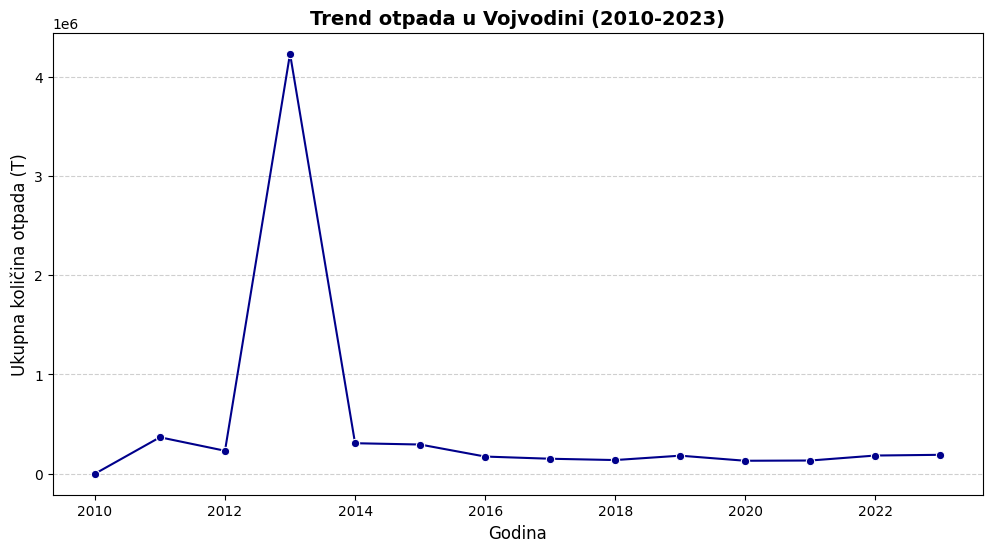

In [46]:
# Vizualizacija otpada u Vojvodini kroz godine
plt.figure(figsize=(12, 6))
vojvodina_trend = df[df["Region"] == "region vojvodine"].groupby("Godina")["KolicinaOtpadaT"].sum()

ax = sns.lineplot(x=vojvodina_trend.index, y=vojvodina_trend.values, marker="o", color="darkblue")
plt.title("Trend otpada u Vojvodini (2010-2023)", fontsize=14, fontweight="bold")
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Ukupna količina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.savefig("vojvodina_otpad_trend.png", dpi=100, bbox_inches="tight")
plt.show()

# Koje industrije su bile ključni faktori u generisanju otpada u Vojvodini u 2012 i 2013.
Generisanje podataka za Top 5 industrijskih sektora u Vojvodini (2012 & 2013)

In [47]:
# Filtriranje podataka za Vojvodinu u 2012 i 2013
vojvodina_2012_2013 = df[(df["Region"] == "region vojvodine") & (df["Godina"].between(2012, 2013))]

# Grupisanje industrija po ukupnoj količini otpada
industrije_2012_2013 = vojvodina_2012_2013.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Prikaz podataka u tabelarnom obliku
print(industrije_2012_2013)

PreteznaDelatnost
0111 gajenje žita (osim pirinča), leguminoza i uljarica               4015650.737
1105 proizvodnja piva                                                  100720.441
2410 proizvodnja sirovog gvožđa, čelika i ferolegura                    99897.260
1081 proizvodnja å¡eä‡era                                               84573.837
2932 proizvodnja ostalih delova i dodatne opreme za motorna vozila      29686.288
Name: KolicinaOtpadaT, dtype: float64


**Ključni faktori rasta otpada u 2012-2013**

# Poljoprivreda – gajenje žita, leguminoza i uljarica (4015650 T)

Ogromna količina otpada dolazi iz agroindustrije, što može biti povezano sa intenzivnijom proizvodnjom i promenama u agrarnim politikama. Ovo može ukazivati na eksploataciju zemljišta, veće korišćenje hemikalija, ili uvođenje novih metoda uzgoja.

# Prehrambena industrija – proizvodnja piva i šećera

Pivarska industrija (100720 T) i proizvodnja šećera (84573 T) značajno doprinose otpadu.Moguće je da je u tom periodu došlo do rasta potrošnje piva i šećera, što bi povećalo industrijski otpad.

# Metalurgija – proizvodnja sirovog gvožđa, čelika i ferolegura (99897 T)

Ovaj sektor je tradicionalno jedan od najvećih generatora otpada.Naglo povećanje proizvodnje metala u 2012 može ukazivati na veći izvoz, infrastrukturne projekte ili industrijski rast.

# Automobilska industrija – proizvodnja delova za motorna vozila (2932)

Ovo može biti povezano sa investicijama u proizvodne pogone ili povećanom potražnjom za auto-delovima.

**Zašto je otpada naglo opao nakon 2013?**

# Ekološke regulative i strožija kontrola otpada

Moguće je da su fabrike počele prijavljivati manje količine otpada ili uvesti efikasnije metode upravljanja otpadom.

# Zatvaranje postrojenja ili smanjenje kapaciteta

Ako su fabrike metala ili prehrambeni pogoni prešli na ekološkije tehnologije, generisanje otpada je moglo značajno opasti.

# Tržišne promene – smanjenje proizvodnje žitarica ili šećera

Poljoprivredni sektor je imao najveći doprinos otpadu u 2012, pa je moguće da su promene u subvencijama ili tržištu dovele do smanjenja proizvodnje nakon 2013.

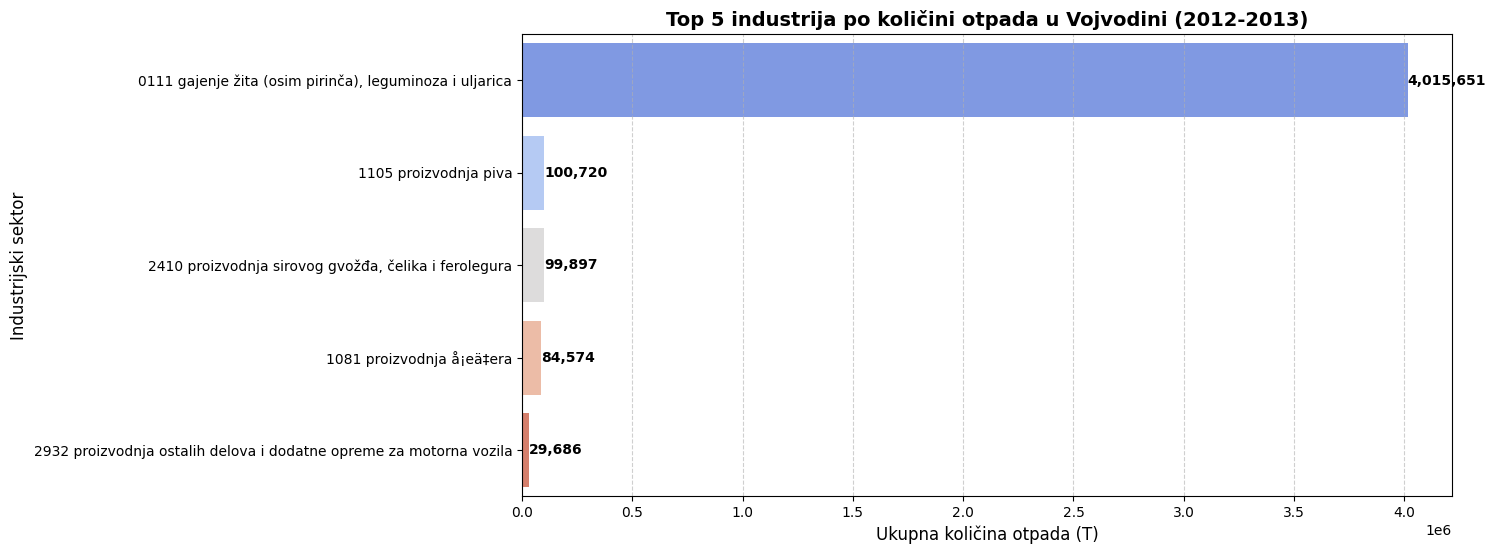

In [48]:
# Bar dijagram za industrije koje su generisale najviše otpada (2012-2013)

# Filtriranje podataka za Vojvodinu u 2012 i 2013
vojvodina_2012_2013 = df[(df["Region"] == "region vojvodine") & (df["Godina"].between(2012, 2013))]

# Grupisanje industrija po ukupnoj količini otpada
industrije_2012_2013 = vojvodina_2012_2013.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Kreiranje bar dijagrama
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=industrije_2012_2013.index, x=industrije_2012_2013.values, hue=industrije_2012_2013.index, palette="coolwarm", legend=False)

# Dodavanje anotacija na stubce
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

# Podešavanje izgleda
plt.title("Top 5 industrija po količini otpada u Vojvodini (2012-2013)", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna količina otpada (T)", fontsize=12)
plt.ylabel("Industrijski sektor", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

# Čuvanje i prikaz dijagrama
plt.savefig("vojvodina_industrije_2012_2013.png", dpi=100, bbox_inches="tight")
plt.show()

**Geografska analiza otpada (2010-2023)**
Sada ćemo istražiti kojim mestima na nivou cele Srbije pripada najveća količina otpada – da li su industrijski centri glavni generatori ili postoje neočekivane oblasti sa velikim količinama otpada?
Kod za analizu geografskog rasporeda otpada

In [50]:
# Korekcija naziva mesta zbog ćiriličnih slova
df["Mesto"] = df["Mesto"].replace({"uå¡ä‡e":"ušće"})

In [52]:
# Grupisanje otpada po mestima za ceo period 2010-2023
geografska_analiza = df.groupby("Mesto")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)

# Kreiranje tabele
tabela = pd.DataFrame({
    "Mesto": geografska_analiza.index,
    "Ukupna količina otpada (T)": geografska_analiza.values
})

# Prikaz podataka u tabelarnom obliku
print(tabela)

            Mesto  Ukupna količina otpada (T)
0       obrenovac                2.988341e+07
1            ušće                2.331556e+07
2   selo kostolac                1.345986e+07
3        kostolac                9.287656e+06
4         radinac                5.583013e+06
5         temerin                4.044351e+06
6  veliki crljeni                3.184799e+06
7       smederevo                2.799870e+06
8      kriva feja                1.738250e+06
9       svilajnac                1.518250e+06


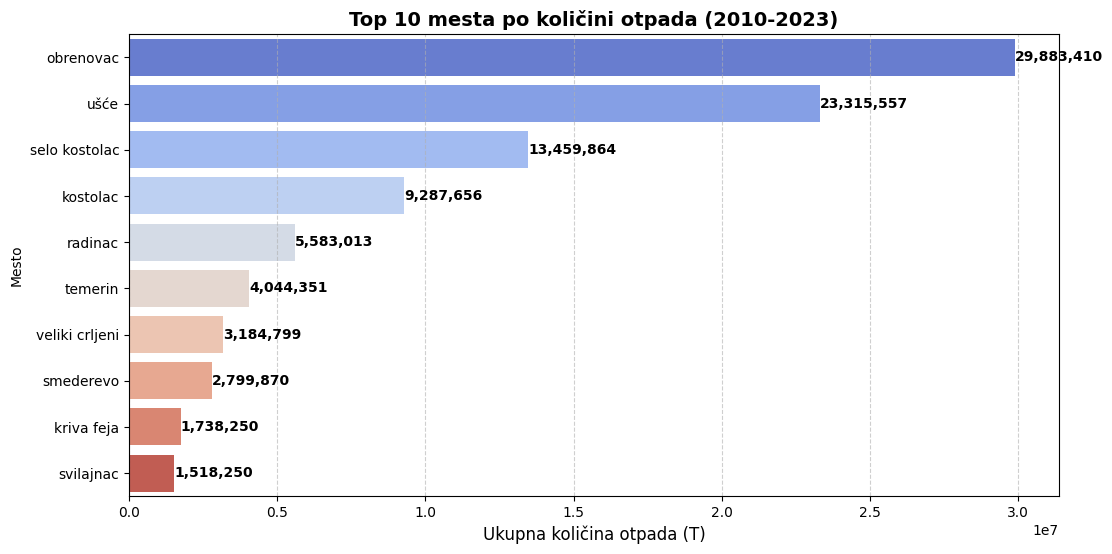

In [53]:
# Grupisanje otpada po mestima za ceo period 2010-2023
geografska_analiza = df.groupby("Mesto")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)

# Kreiranje bar dijagrama
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=geografska_analiza.index, x=geografska_analiza.values, hue=geografska_analiza.index, palette="coolwarm", legend=False)

# Dodavanje anotacija na stubce
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',  # Formatirano u ceo broj sa zarezima
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

# Podešavanje izgleda
plt.title("Top 10 mesta po količini otpada (2010-2023)", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna količina otpada (T)", fontsize=12)
plt.ylabel("Mesto")
plt.grid(axis='x', linestyle="--", alpha=0.6)

# Čuvanje i prikaz dijagrama
plt.savefig("geografska_otpada_2010_2023.png", dpi=100, bbox_inches="tight")
plt.show()

**Ključne analize**
1.Industrijski centri dominiraju → Obrenovac, Kostolac i Smederevo su poznati po termoelektranama, metalurškim postrojenjima i velikoj industrijskoj aktivnosti. 
2.Energetski sektor igra ključnu ulogu → Kostolac i Veliki Crljeni su blizu termoelektrana, pa visok nivo otpada može biti posledica eksploatacije resursa i industrijske obrade. 
3.Poljoprivredno-industrijska mesta u igri → Temerin i Svilajnac nisu klasični industrijski centri, ali mogu imati veliku agroindustrijsku aktivnost, uključujući preradu poljoprivrednih proizvoda.

**Industrijski otpad u Srbiji (2010-2023): Priča o ekološkim promenama**

Industrijski razvoj Srbije tokom poslednje decenije bio je neizostavno povezan sa pitanjem generisanog otpada i njegovim uticajem na životnu sredinu. Kroz sveobuhvatnu analizu podataka, otkrili smo trendove, ključne sektore, regionalne razlike i ekološke izazove koje industrijski otpad postavlja pred društvo.

# Kako je Srbija generisala otpad?
Podaci nam govore priču o dominaciji energetskog sektora, dok se postepeno pojavljuju znaci ekološke tranzicije i prelaska na održivije prakse. Beogradski region je bio najveći generator otpada (57,4M tona), dok je Južna i Istočna Srbija zauzela drugo mesto sa 35,2M tona. Međutim, ovaj otpad nije uniformno raspoređen – termoelektrane, rudarstvo i metalurgija bili su najveći izvori zagađenja.Vojvodina je zabeležila nagli skok otpada u 2012-2013, usled ekspanzije poljoprivrede, metalurgije i prehrambene industrije. Taj trend se prekinuo nakon 2013, verovatno pod uticajem ekoloških regulativa, zatvaranja industrijskih postrojenja ili prelaska na ekološke tehnologije.

# Industrijski sektori: Ko generiše otpad?
Energetski sektor dominira – trgovina električnom energijom (62,1M tona otpada) i proizvodnja električne energije (18,7M tona) čine najveće izvore otpada. U tom kontekstu, Termoelektrane Nikola Tesla (TENT A i B) ostaju ključni faktori, sa ogromnim količinama letećeg pepela od uglja (77,2M tona). Metalurgija i rudarstvo su generisali 8,8M tona otpada, što ukazuje na kontinuiranu eksploataciju gvožđa, čelika i ferolegura. Zanimljivo, poljoprivreda i prehrambena industrija su takođe igrale značajnu ulogu – uzgoj žitarica (4,5M tona), proizvodnja piva, šećera i mlečnih proizvoda pokazuje da agroindustrija nije zanemarljiv ekološki faktor. S druge strane, reciklažni sektor raste – ponovna upotreba razvrstanih materijala (27,052 tona otpada) signalizira tranziciju ka održivijem upravljanju industrijskim otpadom.

# Kako se otpad menjao kroz godine?
2013 godina je bila najkritičnija, sa rekordnih 11,5M tona otpada. Nakon toga, počinje pad količine otpada, koji može biti povezan sa regulatornim promenama, manjim industrijskim kapacitetima i rastom ekološke svesti.Od 2019-2021, beležimo pad eksploatacije lignita i uglja, dok reciklaža i ponovna upotreba materijala beleže rast. Prehrambena industrija, koja ranije nije bila značajan faktor u otpadu, počinje da zauzima sve veći prostor.

# Kako otpad utiče na životnu sredinu?
Leteći pepeo od uglja – najdominantniji oblik otpada – može zagađivati vodene tokove, zemljište i atmosferu, dok zagađenje metalima iz rudarstva ugrožava biološku raznovrsnost i zdravlje ljudi. Poljoprivreda doprinosi zagađenju voda, usled nepravilnog odlaganja otpada bogatog azotom i fosforom, što dovodi do eutrofikacije i uništavanja ekosistema. Sa druge strane, porast reciklaže i održive proizvodnje je pozitivan ekološki pomak, smanjujući potrebu za eksploatacijom sirovina i otvarajući put ka cirkularnoj ekonomiji.

**Šta možemo zaključiti?**
1.Industrijski sektor dominira generisanjem otpada, ali regulative menjaju njegov profil.
2.Ekološke politike i tržišne promene su uticale na pad otpada u Vojvodini nakon 2013.
3.Reciklaža i održiva proizvodnja postaju sve značajniji faktori od 2019-2021.
4.Energetski sektor prolazi kroz transformaciju – eksploatacija uglja opada, dok trgovina električnom energijom raste.
5.Najveći ekološki izazov ostaje termoelektranski pepeo, dok tranzicija ka obnovljivim izvorima energije može umanjiti njegov uticaj.